In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('imbalanced_ratio_dataset3.csv')
df

,Review,Rating
0,I do love this shirt. It's very flattering and...,4.0
1,I just received this today. I found the fit to...,5.0
2,These are NOT Wrangler Willow jeans. These are...,2.0
3,"Great fabric, soft, and 100% giftable!",4.0
4,I have been looking for a long jacket with per...,5.0
...,...,...
17115,I really like these. they're not too distresse...,4.0
17116,This rich color is so flattering! i also love...,4.0
17117,Definitely pj quality. i have a fairly thin fr...,3.0
17118,"After only 5 months, these jeans have started ...",1.0


In [3]:
df.isnull().any()

Review    False
Rating    False
dtype: bool

In [4]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 3481


In [5]:
# Shuffle the balanced DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
df

,Review,Rating
0,I really feel in love with the details of thes...,4.0
1,Despite other reviewers comments on size - i r...,3.0
2,Just felt cheaply made. Bought a large and had...,3.0
3,I love this tank! its something you can dress ...,5.0
4,I loved these pants.they are so comfortable. h...,3.0
...,...,...
17115,This is a cute dress. the quality is very good...,5.0
17116,This is a beautiful sweater that i wanted to l...,3.0
17117,This shirt was strange. the bow tie was too th...,3.0
17118,Color on picture didn’t look like color sent. ...,1.0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x=df['Review']
y=df['Rating']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
#removing punctuations and making lower case
X_train = X_train.str.lower()
X_train = X_train.str.replace(r'\[.*?\]', '', regex=True)


In [11]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # remove emojis
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text


In [12]:
X_train=X_train.apply(clean_text)

In [13]:
X_train

1687     the dress is very pretty i ordered for a weddi...
3584     i ordered size large in the denim color and to...
10608    i really was looking forward to this piece but...
3845     the color and quality are fantastic the shirt ...
5482     i hated this purchase because the dress was hu...
                               ...                        
16555              zipper is for womans garment wrong side
13875                                 returned immediately
6509     i love these pajamas they are soft i love the ...
6755     it doesnt work with me only because i have ver...
15347    i followed the fit size and it worked out grea...
Name: Review, Length: 13696, dtype: object

In [14]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [15]:
#lemmatization and stop word removal
def cleaning(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

In [16]:
X_train=X_train.apply(cleaning)

In [17]:
#removing punctuations and making lower case
X_test = X_test.str.lower()
X_test = X_test.str.replace(r'\[.*?\]', '', regex=True)


In [18]:
X_test=X_test.apply(clean_text)

In [19]:
X_test=X_test.apply(cleaning)

In [20]:
train_df = pd.DataFrame({'Review': X_train, 'Rating': y_train})
test_df = pd.DataFrame({'Review': X_test, 'Rating': y_test})

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3424 entries, 16039 to 10230
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  3424 non-null   object 
 1   Rating  3424 non-null   float64
dtypes: float64(1), object(1)
memory usage: 80.2+ KB


In [22]:
#Filter out reviews with: Fewer than 3 words and Excessively long text

train_df['Word_Count'] = train_df['Review'].astype(str).apply(lambda x: len(x.split()))
train_df = train_df[(train_df['Word_Count'] >= 2) & (train_df['Word_Count'] <= 100)]


X_train = train_df['Review']
y_train = train_df['Rating']

In [23]:
#Filter out reviews with: Fewer than 3 words and Excessively long text
test_df['Word_Count'] = test_df['Review'].astype(str).apply(lambda x: len(x.split()))
test_df = test_df[(test_df['Word_Count'] >= 2) & (test_df['Word_Count'] <= 100)]


X_test = test_df['Review']
y_test = test_df['Rating']

In [24]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [25]:
# TF-IDF Vectorization
tv = TfidfVectorizer()
Xtrain_vec = tv.fit_transform(X_train)
Xtest_vec = tv.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

 Logistic Regression:
Accuracy: 0.5507546611423498
Classification Report:
               precision    recall  f1-score   support

         1.0       0.59      0.39      0.47       334
         2.0       0.61      0.50      0.55       509
         3.0       0.53      0.62      0.57       848
         4.0       0.50      0.58      0.54      1012
         5.0       0.63      0.55      0.58       676

    accuracy                           0.55      3379
   macro avg       0.57      0.53      0.54      3379
weighted avg       0.56      0.55      0.55      3379



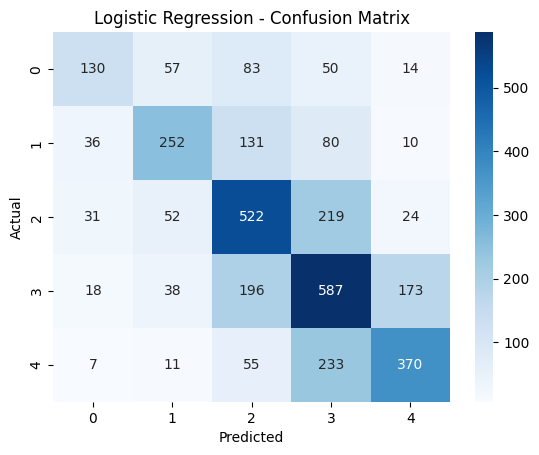

In [27]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(Xtrain_vec, y_train)

# Predict
y_pred_lr = lr.predict(Xtest_vec)

# Evaluation
print(" Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
new_review = ["great dress"]

# Preprocess and vectorize the new review
new_vec = tv.transform(new_review)

# Predict
predicted_rating = lr.predict(new_vec)
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5.0


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],               # Regularization strength
    'penalty': ['l1', 'l2'],               # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear', 'saga']        # Compatible solvers
}

# Create base model
lr = LogisticRegression(max_iter=1000)

# Grid search
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(Xtrain_vec, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_lr = grid_search.best_estimator_

# Predict using best model
y_pred = best_lr.predict(Xtest_vec)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("✅ Accuracy after tuning:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


KeyboardInterrupt: 

🌳 Random Forest:
Accuracy: 0.6559368357121166
Classification Report:
               precision    recall  f1-score   support

         1.0       0.64      0.36      0.46       323
         2.0       0.95      0.81      0.88       490
         3.0       0.78      0.73      0.76       832
         4.0       0.53      0.75      0.62       994
         5.0       0.59      0.44      0.50       654

    accuracy                           0.66      3293
   macro avg       0.70      0.62      0.64      3293
weighted avg       0.68      0.66      0.65      3293



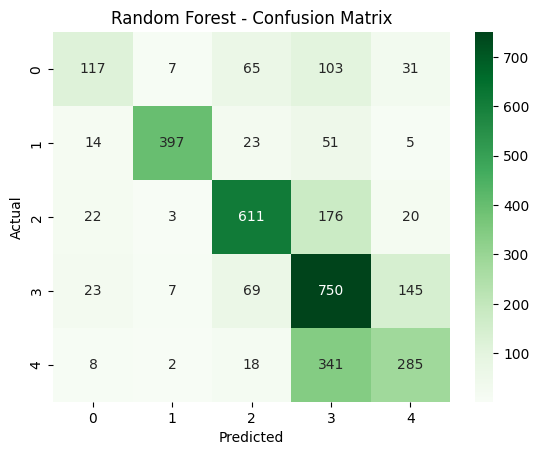

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(Xtrain_vec, y_train)

# Predict
y_pred_rf = rf.predict(Xtest_vec)

# Evaluation
print("🌳 Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 3 folds for each of 48 candidates, totalling 144 fits
🎯 Best Parameters Found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
✅ Accuracy: 0.6729426055268752
📊 Classification Report:
               precision    recall  f1-score   support

         1.0       0.63      0.40      0.49       323
         2.0       0.97      0.81      0.88       490
         3.0       0.86      0.74      0.79       832
         4.0       0.53      0.80      0.64       994
         5.0       0.61      0.42      0.50       654

    accuracy                           0.67      3293
   macro avg       0.72      0.64      0.66      3293
weighted avg       0.70      0.67      0.67      3293



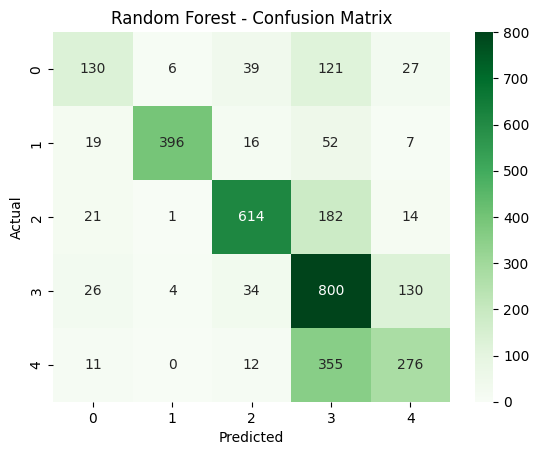

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit on training data
grid_search.fit(Xtrain_vec, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict
y_pred_rf = best_rf.predict(Xtest_vec)

# Evaluation
print(" Best Parameters Found:", grid_search.best_params_)
print(" Accuracy:", accuracy_score(y_test, y_pred_rf))
print(" Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pickle

# Save the model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)
print("✅ Model saved using pickle.")

✅ Model saved using pickle.


In [ ]:
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tv, f)

📈 Stacking with SVM + XGBoost:
Accuracy: 0.6954145156392347
Report:
               precision    recall  f1-score   support

         1.0       0.56      0.67      0.61       323
         2.0       0.99      0.81      0.89       490
         3.0       0.89      0.71      0.79       832
         4.0       0.58      0.71      0.64       994
         5.0       0.62      0.57      0.60       654

    accuracy                           0.70      3293
   macro avg       0.73      0.70      0.70      3293
weighted avg       0.72      0.70      0.70      3293



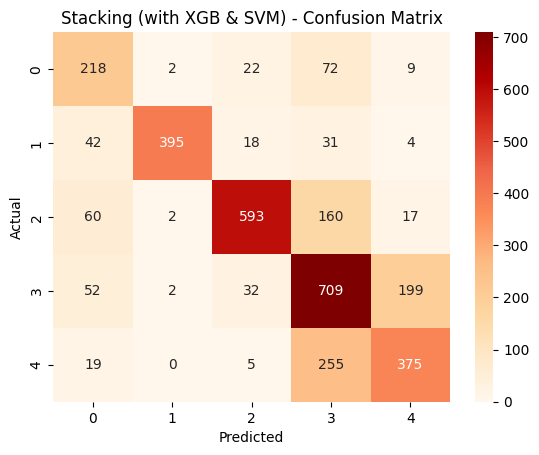

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
estimators = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('nb', MultinomialNB()),
    ('svc', LinearSVC(max_iter=1000)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_jobs=-1
)

stacking_clf.fit(Xtrain_vec, y_train)
y_pred_stack = stacking_clf.predict(Xtest_vec)

print("📈 Stacking with SVM + XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Report:\n", classification_report(y_test, y_pred_stack))

sns.heatmap(confusion_matrix(y_test, y_pred_stack), annot=True, fmt="d", cmap="OrRd")
plt.title("Stacking (with XGB & SVM) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
import pickle
# Load the model
with open("balance.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Load the vectorizer
with open("vecbalance.pkl", "rb") as f:
    loaded_vectorizer = pickle.load(f)


In [31]:
# Transform new data using the loaded vectorizer
X_train_vec_new = loaded_vectorizer.transform(X_train)
X_test_vec_new = loaded_vectorizer.transform(X_test)

# Predict using the loaded model
y_pred = loaded_model.predict(X_test_vec_new)


In [32]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.429121041728322
              precision    recall  f1-score   support

         1.0       0.32      0.61      0.42       334
         2.0       0.28      0.27      0.28       509
         3.0       0.44      0.30      0.35       848
         4.0       0.51      0.42      0.46      1012
         5.0       0.51      0.64      0.57       676

    accuracy                           0.43      3379
   macro avg       0.41      0.45      0.42      3379
weighted avg       0.44      0.43      0.42      3379

